In [157]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [158]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import gamma

import models

#### Generate time

In [159]:
TIME_S = 0.155
TIME_F = 4
TIME_NO = 20

times = np.linspace(TIME_S, TIME_F, TIME_NO + 1)

In [160]:
times

array([0.155  , 0.34725, 0.5395 , 0.73175, 0.924  , 1.11625, 1.3085 ,
       1.50075, 1.693  , 1.88525, 2.0775 , 2.26975, 2.462  , 2.65425,
       2.8465 , 3.03875, 3.231  , 3.42325, 3.6155 , 3.80775, 4.     ])

#### Compute charge

In [161]:
eta0 = 0.1 # charge
tau = 1 # time constant
c = 0.6  # frequency exponential

eta = models.modelColeColeTD(times, eta0, tau, c)

In [162]:
eta

array([0.0713693 , 0.05937665, 0.05199274, 0.04672463, 0.04268936,
       0.03946084, 0.03679909, 0.03455538, 0.03263125, 0.03095824,
       0.02948697, 0.02818071, 0.02701145, 0.02595742, 0.02500139,
       0.02412951, 0.0233305 , 0.02259508, 0.02191552, 0.02128534,
       0.02069904])

#### Add noise

In [163]:
SNR = 50
# SNR = 100
eta_noise = eta + np.random.normal(0, 10**(-SNR/20), len(eta))

In [164]:
eta_noise

array([0.06908066, 0.05572512, 0.05719127, 0.04208995, 0.04466344,
       0.03510659, 0.0395776 , 0.03403831, 0.03260298, 0.03000901,
       0.02790196, 0.02873907, 0.02742727, 0.02474556, 0.02541077,
       0.02426659, 0.02169528, 0.02272666, 0.0301302 , 0.02209745,
       0.02426216])

#### Fit

In [165]:
model, response = models.fitCCTD(times, eta_noise)

eta0, tau, c = model
eta_resp = response

#### Plot

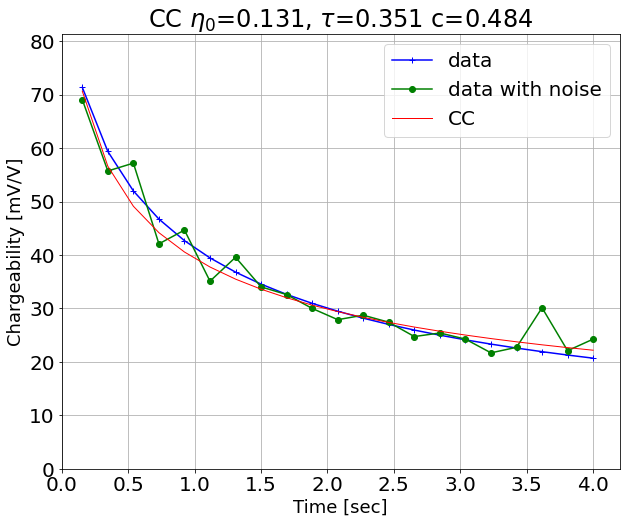

In [166]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(10, 8))
plt.plot(times, eta*1000,'-b+', label="data")
plt.plot(times, eta_noise*1000,'-go', label="data with noise")
plt.plot(times, eta_resp*1000,'-r', linewidth=1, label=f"CC")
plt.xlabel('Time [sec]',fontsize = 18)
plt.ylabel('Chargeability [mV/V]',fontsize = 18)
plt.xlim([0, np.max(times)+0.2])
plt.ylim([0, np.max(eta)*1000+10])
plt.legend()
plt.grid(True)
plt.title(fr"CC $\eta_0$={eta0:.3f}, $\tau$={tau:.3f} c={c:.3f}")
plt.savefig("test2.png")
plt.show()  